# Animal Behaviour 

In this use-case, we show how to use our Khiva library to analyse the behaviour of animals. Particularly,
this use-case is based on the analysis of telemetry collected from Magellanic penguins, but it could be applied to any kind of telemetry recollected from other animals or humans. 

The [dataset](http://www.cs.ucr.edu/~eamonn/MP_first_test_penguin_sample.mat), and [use case](http://www.cs.ucr.edu/~eamonn/STOMP_GPU_final_submission_camera_ready.pdf) have been published by the research team of Professor [Eamonn Keogh](http://www.cs.ucr.edu/~eamonn/).


## Configuration
In the code below, we load the needed libraries and we set up some configuration parameters

In [1]:
import scipy.io
import khiva as kv
import time
import sklearn.utils
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 5]

## Import the data

This data was collected by attaching a small multi-channel data-logging device to the birds. The device records tri-axial acceleration, tri-axial magnetometry, pressure, etc. 

As you can see in the next image we have only considered Y-axis magnetometry for simplicity.


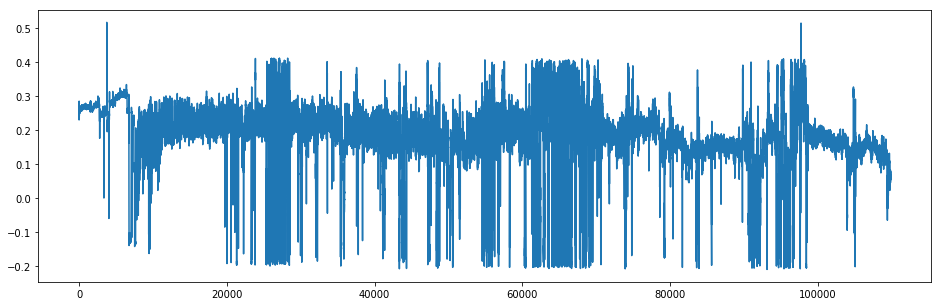

In [2]:
penguin_data = scipy.io.loadmat("penguin.mat")
magnetometry = penguin_data['penguin_sample']

plt.plot(range(len(magnetometry)), magnetometry)
plt.show()

*In the above figure we can appreciate high levels of noise and no obvious structure.*

## Analyze the data

The data was labelled by an observer with binoculars; thus, we have a coarse ground truth for the animal's behaviour. The full data consists of 1.048.575 data points recorded at 40 Hz (about 7.5 hours).

We ran GPU-STOMP on this dataset, using a subsequence length of 800.

> Note: if running in hub.mybinder consider it doesn't provide a GPU and its CPU is shared among 
> other jupyter instances, so it may be slower than runing in your local machine.

It tooked 1.2374801635742188 seconds


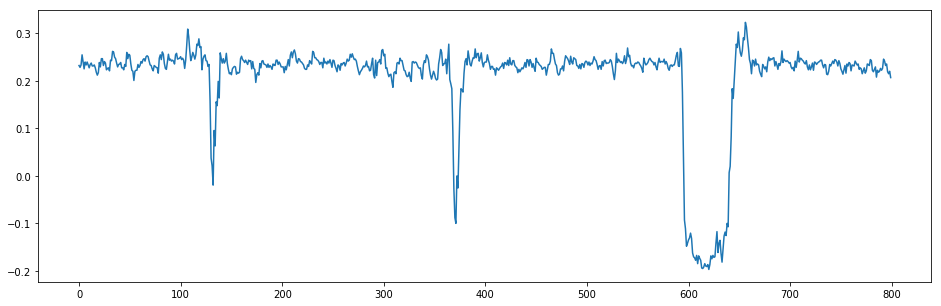

In [3]:
start = time.time()
interval = 800

# In order to speed up the process, we select a subset of the dataset, which contains the target motif
subset = [i[0] for i in magnetometry[20000:25000]]

profile, index = kv.stomp_self_join(kv.Array(subset), interval)

distance, index, subsequence = kv.find_best_n_motifs(profile, index, interval, 1)
print("Execution time " + str(time.time() - start) + " in seconds")

# Plotting the subset (blue line)
plt.plot(range(len(subset)), subset)

# Ploting the nearest segment (orange line)
plt.plot(range(index.to_numpy()[0], index.to_numpy()[0] + interval), subset[index.to_numpy()[0]:index.to_numpy()[0] + interval])

# Plot the motif (green line)
plt.plot(range(subsequence.to_numpy()[0], subsequence.to_numpy()[0] + interval), subset[subsequence.to_numpy()[0]:subsequence.to_numpy()[0] + interval])
plt.show()

As shown in figure above, the top motif shows a very distinctive pattern.

The meaning of this top motif could be seen observing the behavioural data labelled by the observer. This pattern did not happen during any of the regions annotated as nesting, walking, washing, etc., but only during regions labelled foraging.

Diving is the one behaviour we can unambiguously determine from the data, as the pressure increases by orders of magnitude when the penguin is under water.

Researchers discovered that the motif occurs moments before each, dive, and nowhere else.

We encourage you to use our [Khiva library](https://github.com/shapelets/khiva) to make the best of the STOMP algorithm in other animal/human behaviours and share it with us!

![Penguin](penguin.gif)
